# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [163]:
import pandas as pd

In [164]:
data = pd.read_csv('train.csv')

In [165]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [166]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [167]:
data.shape

(7613, 5)

In [168]:
data.isnull().sum().sum() # столько пропущенных значений

2594

In [169]:
data.isnull().sum() # распределение пропусков по столбцам

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [170]:
train.head()

,id,keyword,location,text,target
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0


In [171]:
# заполнение пропусков
X_train = train.fillna("")
X_train.head()

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0


In [172]:
test.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [173]:
# заполнение пропусков
X_test = test.fillna("")
X_test.head()

,id,keyword,location,text,target
2644,3796,destruction,,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [174]:
X_train['target'].value_counts() # никакой класс сильно не преобладает

0    3024
1    2305
Name: target, dtype: int64

In [175]:
key = X_train['keyword'].value_counts()[1:11] # начал с первого, а не с нулевого, так как на первом месте значение - 
# пустая строка, а это не очень то интересно
key

damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
fatality      30
Name: keyword, dtype: int64

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [177]:
d = pd.concat([X_train[X_train.keyword == 'damage'], X_train[X_train.keyword == 'siren'], 
               X_train[X_train.keyword == 'wreckage'], X_train[X_train.keyword == 'fatalities'],
              X_train[X_train.keyword == 'deluge'], X_train[X_train.keyword == 'refugees'],
              X_train[X_train.keyword == 'derail'], X_train[X_train.keyword == 'fear'],
              X_train[X_train.keyword == 'tsunami'], X_train[X_train.keyword == 'fatality']], axis = 0)
d

,id,keyword,location,text,target
2004,2880,damage,Austin | San Diego,@swb1192 if the NDA is written to damage your ...,0
1983,2854,damage,,Drop it down on a nigga do damage ! ??,0
2008,2884,damage,London/New York,#pt Cross-sectarian protest. Powerful Shia cle...,1
1988,2860,damage,My mind is my world,And here I was complaining about Phoenix Mode ...,0
1987,2858,damage,U.S,#fitness Knee Damage Solution http://t.co/pUMb...,0
...,...,...,...,...,...
3687,5247,fatality,USA,Kosciusko police investigating pedestrian fata...,0
3677,5232,fatality,434,They are making a Bad Boys 3 and 4!! A must see,0
3672,5227,fatality,New Jersey,@Tellyfckngo @JayCootchi nah you hit homie wit...,0
3675,5230,fatality,,@Bardissimo Yes life has a 100% fatality rate.,0


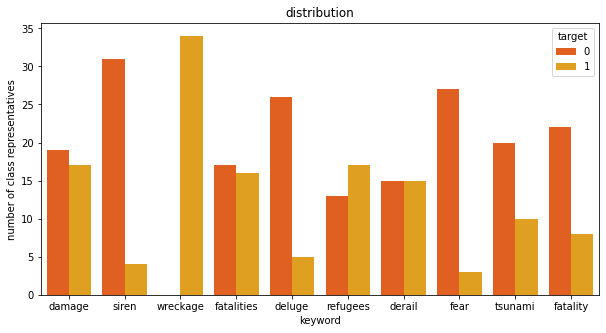

In [178]:
plt.figure(figsize=(10,5))
sns.barplot(x='keyword', y=np.ones(319), hue='target', data=d, palette='autumn', estimator=np.sum)
plt.title('distribution')
plt.ylabel('number of class representatives')
plt.xlabel('keyword')
plt.show()

In [179]:
# видно, что некоторые значения переменной keyword являются достаточно ценными, то есть по ним можно с высокой долей вероятности
# верно восстановить значение целевой переменной. Среди них: siren, wreckage, deluge, fear. Остальные не дают нам настолько 
# много информации

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [180]:
X_train = X_train.drop('id', axis=1)

In [181]:
X_train

,keyword,location,text,target
1186,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,rioting,,Still rioting in a couple of hours left until ...,1
7445,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...
5226,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,panic,,just had a panic attack bc I don't have enough...,0
860,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,,,Officials say a quarantine is in place at an A...,1


In [182]:
X_train_new = pd.DataFrame(map(lambda x: x[0] + ' ' + x[1]+ ' ' + x[2], np.array(X_train[['keyword', 'location', 'text']])))
X_train_new

,0
0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
2,police Houston CNN: Tennessee movie theater s...
3,rioting Still rioting in a couple of hours le...
4,wounds Lake Highlands Crack in the path where ...
...,...
5324,obliteration Merica! @Eganator2000 There aren'...
5325,panic just had a panic attack bc I don't have...
5326,blood Omron HEM-712C Automatic Blood Pressure...
5327,Officials say a quarantine is in place at an...


In [183]:
X_train_new = pd.concat([X_train_new, pd.DataFrame(np.array(X_train.target))], axis = 1)
X_train_new.columns = ['text', 'target']
X_train_new

,text,target
0,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
2,police Houston CNN: Tennessee movie theater s...,1
3,rioting Still rioting in a couple of hours le...,1
4,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5324,obliteration Merica! @Eganator2000 There aren'...,0
5325,panic just had a panic attack bc I don't have...,0
5326,blood Omron HEM-712C Automatic Blood Pressure...,0
5327,Officials say a quarantine is in place at an...,1


In [184]:
# теперь для test:
X_test = X_test.drop('id', axis=1)
X_test_new = pd.DataFrame(map(lambda x: x[0] + ' ' + x[1] + ' ' + x[2], np.array(X_test[['keyword', 'location', 'text']])))
X_test_new = pd.concat([X_test_new, pd.DataFrame(np.array(X_test.target))], axis = 1)
X_test_new.columns = ['text', 'target']
X_test_new

,text,target
0,destruction So you have a new weapon that can...,1
1,deluge The f$&amp;@ing things I do for #GISHW...,0
2,police UK DT @georgegalloway: RT @Galloway4May...,1
3,aftershock Aftershock back to school kick off...,0
4,"trauma Montgomery County, MD in response to tr...",0
...,...,...
2279,"hellfire 570 Vanderbilt; Brooklyn, NY New cock...",0
2280,evacuation USA Bend Post Office roofers cut ga...,1
2281,collided Monsoon flooding - Monsoon rains hav...,1
2282,massacre Ireland Remember this was a massacre ...,1


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [185]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(X_train_new.text)
X

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

In [ ]:
# размер 5329 на 18455

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [186]:
cnt_vec.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [ ]:
# ключи в этом словаре - это просто номера столбцов, которые отвечают данному слову

In [187]:
vocab = list(cnt_vec.vocabulary_.items())
vocab[0:10]

[('bridge', 2948),
 ('20collapse', 320),
 ('ashes', 1928),
 ('2015', 295),
 ('australia', 2059),
 ('ûªs', 18425),
 ('collapse', 3914),
 ('at', 1977),
 ('trent', 16483),
 ('among', 1628)]

In [188]:
# сделаем одну большую строку из всех слов, записанных через пробел, чтобы мы могли применить findall:
all_words = ''
for i in vocab:
    all_words = all_words + i[0] + ' '
all_words

'bridge 20collapse ashes 2015 australia ûªs collapse at trent among worst in history england bundled out for 60 http co t5trhjuau0 hail carol stream illinois great michigan technique camp b1g thanks to bmurph1019 hail_youtsey termn8r13 goblue wrestleon oaskgki6qj police houston cnn tennessee movie theater shooting suspect killed by di8elzswnr rioting still couple of hours left until have be up class wounds lake highlands crack the path where wiped this morning during beach run surface on elbow and right knee yaqrsximph airplane 20accident somewhere there experts france begin examining debris found reunion island french air accident tagzbcxfj0 mlb bloody isolated city world perth came kill indians fun video smirking remorseless pakistani killer shows him boasting fpjlwoxklg burning johnsontionne except idk them it really destroy he or she her ask house wounded maracay nirgua venezuela officer dead after exchanging shots xxfk4khbiw wreck currently writing book friggin destiel sucks read 

In [200]:
import re
prog = re.compile('\S*[0-9]\S*')
prog.findall('ggj31gfgj jksjf ghg4ghjk 67')

['ggj31gfgj', 'ghg4ghjk', '67']

In [201]:
# слова, содеращие цифры:
import re

prog = re.compile('\S*[0-9]\S*')
len(prog.findall(all_words))      

3812

In [ ]:
# итого тут 3812 слов, содержащих цифры (из 18455)

In [203]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [207]:
# с пунктуацией:

prog = re.compile('\S*[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]\S*')
len(prog.findall(all_words))

315

In [ ]:
# 315 слов с пунктуацией

In [210]:
# хэштеги и упоминания:
prog = re.compile('[#@]\S*')
len(prog.findall(all_words))

0

In [ ]:
# 0 хэштегов и упоминаний (как раз таки плохо, так как мы хотим видеть это в твитах (наверное...))

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [218]:
from nltk.tokenize import TweetTokenizer

In [222]:
def tok(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

cnt = CountVectorizer(tokenizer=tok)
X = cnt.fit_transform(X_train_new.text)
X

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [223]:
from string import punctuation

vocab = list(cnt.vocabulary_.items())

all_words = ''
for i in vocab:
    all_words = all_words + i[0] + ' '

prog = re.compile('\S*[0-9]\S*')
a = len(prog.findall(all_words))

prog = re.compile('\S*[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]\S*')
b = len(prog.findall(all_words))

prog = re.compile('[#@]\S*')
c = len(prog.findall(all_words))

str(a) + ' с цифрами, ' + str(b) + ' с пунктуацией, ' + str(c) + ' хэштегов и упоминаний'

'3941 с цифрами, 7339 с пунктуацией, 3155 хэштегов и упоминаний'

In [ ]:
# в общем, с цифрами примерно столько же слов, при этом очень сильно возросло количесвто слов с пунктуацией (половина из
# которых хэштеги и упоминания, ведь # и @ тоже считаются знаками препинания), что не очень хорошо. Хэштегов и упоминаний стало 
# больше, что, возможно, нам поможет

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [246]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Решин
[nltk_data]     Кирилл\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [308]:
def MyTokenizer(text):
    text = text.lower() # 0. к нижнему регистру
    
    tw = TweetTokenizer()
    tokens1 = tw.tokenize(text) # 1. разбили на токены
    text = ''
    for i in tokens1:
        text = text + i + ' ' # сделали одну большую строку токенов через пробел
    
    prog = re.compile('[a-z]*') # только латинские буквы
    tokens_latin = prog.findall(text)
    prog = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]*[)(][!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]*') # смайлики
    tokens_smile = prog.findall(text)
    prog = re.compile('#[a-z]*') # хэштеги
    tokens_hash = prog.findall(text)
    text = ''
    for i in tokens_latin:
        text = text + i + ' '
    for i in tokens_smile:
        text = text + i + ' '
    for i in tokens_hash:
        text = text + i + ' ' # 2. теперь у нас одна большая строка слов, удовлетворяющих пункту 2)
        
    import nltk
    from nltk.corpus import stopwords
    STOPWORDS = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # 3. удалили все стоп слова
    
    from nltk.stem.snowball import SnowballStemmer
    text_tokenized = text.split()
    stemmer = SnowballStemmer('english')
    text_stemmed = [stemmer.stem(w) for w in text_tokenized] # 4. застеммили
    
    return text_stemmed

In [248]:
for i in range(10):
    print(X_train_new.text[i])
    print(MyTokenizer(X_train_new.text[i]))

bridge%20collapse  Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0
['bridg', 'collaps', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia', 'http', 'co', 'trhjuau']
hail Carol Stream, Illinois GREAT MICHIGAN TECHNIQUE CAMP
B1G THANKS TO @bmurph1019 
@hail_Youtsey . @termn8r13 
#GoBlue #WrestleOn http://t.co/OasKgki6Qj
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'b', 'g', 'thank', 'bmurph', 'hail', 'youtsey', 'termn', 'r', 'goblu', 'wrestleon', 'http', 'co', 'oaskgki', 'qj', '#goblu', '#wrestleon']
police Houston  CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic', 'http', 'co', 'di', 'elzswnr']
rioting  Still rioting in a couple of hours left until I have to be up for class.


In [ ]:
# вроде все верно работает

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [256]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression

In [250]:
y_train = X_train_new.target
X_train = X_train_new.text
y_test = X_test_new.target
X_test = X_test_new.text

In [261]:
cnt = CountVectorizer(tokenizer=MyTokenizer)
bow = cnt.fit_transform(X_train)
bow_test = cnt.transform(X_test)

#scaler = MaxAbsScaler()
#bow = scaler.fit_transform(bow)
#bow_test = scaler.transform(bow_test)

In [262]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1318
           1       0.79      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [264]:
vec = TfidfVectorizer(tokenizer=MyTokenizer)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)

#scaler = MaxAbsScaler()
#bow = scaler.fit_transform(bow)
#bow_test = scaler.transform(bow_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1318
           1       0.78      0.71      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
# качество почти не изменилось, даже немного просело

In [266]:
bow

<5329x17483 sparse matrix of type '<class 'numpy.float64'>'
	with 68784 stored elements in Compressed Sparse Row format>

In [ ]:
# это размер матрицы

In [309]:
vec = TfidfVectorizer(tokenizer=MyTokenizer, max_df = 0.9)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))
bow

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1318
           1       0.78      0.71      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



<5329x17483 sparse matrix of type '<class 'numpy.float64'>'
	with 68784 stored elements in Compressed Sparse Row format>

In [310]:
# max_df = 0.9 означает, что мы игнорируем те слова, которые встречаются в более чем 90% документов. Видимо таких нет, так как
# ничего не изменилось

In [313]:
vec = TfidfVectorizer(tokenizer=MyTokenizer, min_df = 0.001)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))
bow

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.70      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



<5329x1912 sparse matrix of type '<class 'numpy.float64'>'
	with 46853 stored elements in Compressed Sparse Row format>

In [ ]:
# min_df = 0.001 означает, что мы игнорируем слова, которые появляются менее, чем в 0.1% текстах
# выглядит очень странно, так как видим, что почти все слова очень редкие (размер матрицы уменьшился с 17483 до 1912)
# возможно, частые слова мы и так выкинули в MyTokenzer (стоп слова мы же выкинули)
# качество осталось почти таким же

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [314]:
from sklearn.feature_extraction.text import HashingVectorizer
vec = HashingVectorizer(tokenizer=MyTokenizer, n_features = 5000)
bow = vec.fit_transform(X_train)
bow_test = vec.transform(X_test)

clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))
bow

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1318
           1       0.78      0.68      0.72       966

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284



<5329x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 68709 stored elements in Compressed Sparse Row format>

In [315]:
# тоже хуже стало, хоть и чуть-чуть
# в общем, в начале было лучше (см задание 8)

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [316]:
# уже сделано :)